# Lab Session I: Low-rank matrix using SVD

You can make teams of 2 persons for this lab session. (En binôme)

In this Lab session, you will learn the utilisation of SVD, especially with low rank SVD. The following libraries are necessary (not only for this session):
* Numpy: a library for matrix manipulation
* Pandas: a library for data manipulation and management
* matplotlib: a poupular library for a visulisation
* Scipy: a library for scitific math 
* Scikit-learn: a popular library for machine learning 

You can install the environment through package and environment management systems, such as Anaconda(https://www.anaconda.com/),
or directly use online environment, such as Google Colab (https://colab.research.google.com/)
Use Python > 3.5 for some coding featues.



## 1. Construct of SVD: Get started with matrix manipulation

To learn using python for matrix manipulation, we firstly start with a simple utilisation with analytic SVD calculating. Complete the following skeleton. 

Let's start with a simple example:

In [175]:
import numpy as np
from matplotlib import image
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import scipy

# Given a matrix A, calculate its SVD in an analytic way.
# The skeleton given below is in the form of method. You can also do it step by step as a sequential script firstly, 
# then integrate them into a method after every step returns wanted result.
# Start with a specific example: 

A = np.vstack([[1,0,1],[-2,1,0]])


Get the dimension m and n of the matrix A, with attribute "shape" (https://numpy.org/doc/stable/reference/generated/numpy.ndarray.shape.html)

In [176]:
m, n = A.shape
print(m, n)

2 3


Construct a symmetric matric ATA by multiplying A and A transpose. Refer to the manual for linear algebra operations (https://numpy.org/doc/stable/reference/routines.linalg.html)


In [188]:
ATA= A.T@ A
print(ATA)

[[ 5 -2  1]
 [-2  1  0]
 [ 1  0  1]]


Find the eigenvalues and eigenvectors of the matrix ATA by method numpy.linalg.eig(). (https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html#numpy.linalg.eig)


In [191]:
vals, vecs = np.linalg.eig(ATA)
vals = np.round(vals)
print(vals, vecs)

[ 6. -0.  1.] [[ 0.91287093 -0.40824829  0.        ]
 [-0.36514837 -0.81649658  0.4472136 ]
 [ 0.18257419  0.40824829  0.89442719]]


Reorder the eigenvalues in a decreasing way, put the values into a diagonal matrix D by multiplying with an identity matrix.
Reorder the eigenvectors corresponding to the eigenvalues, in order to compose the matrix P in the eigen decomposition of ATA

Hint 1: Use np.argsort(vals) to get the order index of each eigen value. Then, reorder the eigenvalues and eigenvectors with this index. 
(This is a trivial process. Take your time with reflexion.)

Hint 2: Use np.eye(n) to generate an identity matrix with size n.

Hint 3: Use np.vstack(tup) and np.hstack(tup) to stack a tuple of arrays (tup) vertically and horizentally. See examples in https://numpy.org/doc/stable/reference/generated/numpy.vstack.html

In [226]:
sorted_indices = np.argsort(vals)[::-1]
vals = vals[sorted_indices]
vecs = vecs[:, sorted_indices]
print(vals, vecs)
# Create the diagonal matrix D using the eigenvalues
D = np.diag(vals)

# Compose the matrix P using the reordered eigenvectors
P = vecs
V = P.T



[ 6.  1. -0.] [[ 0.91287093  0.         -0.40824829]
 [-0.36514837  0.4472136  -0.81649658]
 [ 0.18257419  0.89442719  0.40824829]]
[[ 0.91287093  0.         -0.40824829]
 [-0.36514837  0.4472136  -0.81649658]
 [ 0.18257419  0.89442719  0.40824829]]
[[ 0.91287093 -0.36514837  0.18257419]
 [ 0.          0.4472136   0.89442719]
 [-0.40824829 -0.81649658  0.40824829]]


Construct Matrix Sigma from the square root of D, with padded 0's to match shape of A. You can use np.vstack() or np.hstack() to pad the matrix

In [217]:
min_dim = min(m, n)
Sigma = np.zeros((m, n))
for i in range(min_dim):
    if vals[i] > 0:
        Sigma[i, i] = np.sqrt(vals[i])


        

[[2.44948974 0.         0.        ]
 [0.         1.         0.        ]]
(3, 2)


Now you have matrix V, which is equivalent to P transpose. You have matrix Sigma. There is only matrix U left to calculate.

(You can do that in an iterative way)

In [240]:
# Calculate matrix U
U = A @ P @ np.linalg.pinv(Sigma)
U

array([[ 0.4472136 ,  0.89442719],
       [-0.89442719,  0.4472136 ]])

Write your calculation in a method. Be careful, you need to adapt your method to matrix with any dimensions.

In [315]:
def SVD_analytic(A):
    """Calculating SVD in analytic way
    Args: 
        A: ndarray, matrix to be decomposed
    Returns:
        (U, Sig, VT): tuple of three ndarrays. Representing the three matrix U Sigma and V transpose in SVD.
    """
    # complete your code here
    ATA = A.T @ A
    vals, vecs = np.linalg.eig(ATA)
    vals = np.round(vals)
    sorted_indices = np.argsort(vals)[::-1]
    vals = vals[sorted_indices]
    vecs = vecs[:, sorted_indices]
    #Create the diagonal matrix D using the eigenvalues
    D = np.diag(vals)
    # Compose the matrix P using the reordered eigenvectors
    P = vecs
    V = P.T
    min_dim = min(m, n)
    Sigma = np.zeros((m, n))
    for i in range(min_dim):
        if vals[i] > 0:
            Sigma[i, i] = np.sqrt(vals[i])
    U = A @ P @ np.linalg.pinv(Sigma)
    
    return U, Sigma, V

In [245]:
# To verify that your answer is correct. Print some simple Matrix and see the multiplication of their SVD components
A = np.vstack([[1,0,1],[-2,1,0]])
print(A)
U, S, VT = SVD_analytic(A)
print(U@S@VT)
#The values are not exactly the same, but they are very close because of rounding.

[[ 1  0  1]
 [-2  1  0]]
[[ 1.00000000e+00 -4.29162278e-17  1.00000000e+00]
 [-2.00000000e+00  1.00000000e+00 -4.29162278e-17]]


In [314]:
# You can verify your solution with SVD implemented in Numpy, with the function np.linalg.svd()

U_, S_, V_ = np.linalg.svd(A)
print(U_, S_, V_)

#print(U_@S_@V_.T) doesnt work for some reason
#print(np.allclose(U@S@VT, U_@S_@V_)) i think it's because S is not from formatted properly to be reuses, it's a 1D array

# Noting that the results are usually obtained by approximation, you will not get precisely equivalent values from diffrent methods. 
# To compare is two matrix A and B are approximately equivalent, use method np.allclose(A,B) (https://numpy.org/doc/stable/reference/generated/numpy.allclose.html)



[[-0.21483724  0.88723069  0.40824829]
 [-0.52058739  0.24964395 -0.81649658]
 [-0.82633754 -0.38794278  0.40824829]] [1.68481034e+01 1.06836951e+00 4.41842475e-16] [[-0.47967118 -0.57236779 -0.66506441]
 [-0.77669099 -0.07568647  0.62531805]
 [-0.40824829  0.81649658 -0.40824829]]


Now you have some basic notions on matrix manipulation with Python. Let's do some more advanced exercises with SVD.

## 2. Data compression with low-rank SVD

Images are made up by pixels, which are essentially matrix. We will see how low rank SVD compresses an image.
A colorful image is usually represented by three matrix, respectively containing the color information of Red Green and Blue (RGB).
To simplify the data processing, monochrome image with greyscale is usually applied, represented by a single matrix.

To run the programme, you should put the image file at the same directory with this notebook.
If you are using Google Colab, put the image file at the root directory of your Colab project.

In [275]:
# A function converting RBG to monochrone image.
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])


# Load the RGB file as three matrix and convert it to monochrone greyscale image as a single matrix
img = image.imread("images/Mona_Lisa.jpg")
img = rgb2gray(img) # convert from rgb to monochrome, so that an image is represented by a single matrix

# 1. Normalise the values in the matrix, by making every entry lie in range [0,1] (hint: the maximum value in a matrix can be found by np.max())
img = (img-np.min(img))/(np.max(img)-np.min(img))


# 2. Calculate the rank of the matrix img by np.linalg.matrix_rank() refer to the manual for more info.
img_rank = np.linalg.matrix_rank(img, 0.)

# 3. Run SVD on Image
U, S, VT = np.linalg.svd(img)

246


Now we illustrate the singuler values on each rank, and the information restrained with different number of rank.
The singuler values should be sorted in a descdent way, denoted by $S$ (the output of method np.linalg.svd() is in a such form by default.)
Given a rank $r$, the information restrained $IR$ is calculated by the cumulative sum of the singular values, represented by percentage. i.e.
$$
IR_r = \sum_{i=1}^{i=r}S[i] \times 100\%
$$

In [264]:
total_S = S.sum() # Used to calculate the percentage of cumulative sum
n_components = len(S) # The number of all possible ranks (full rank)
component_idx = range(1,  n_components + 1) # This variable is used for plotting
# 4. Implement the equation above to calculate retained information. 
# info_retained should be a 1D-array with the size of n_components
# hint: use method np.cumsum() https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html
info_retained= np.cumsum(S)/total_S*100


[ 26.07373732  33.868142    39.37808908  43.56729351  46.56774784
  48.99441842  51.16159098  53.10543821  54.81142202  56.41095157
  57.91814037  59.19836794  60.37891413  61.42596998  62.39914698
  63.31034249  64.15924024  64.95901872  65.68728893  66.40960931
  67.11601217  67.79723701  68.4449673   69.09001819  69.69994273
  70.30048057  70.88969385  71.45821522  72.01027707  72.55069033
  73.0793293   73.57993475  74.07111306  74.54610568  75.01313899
  75.47394964  75.90430528  76.33262817  76.74765858  77.15769546
  77.55734449  77.95391715  78.34066033  78.7251585   79.09690263
  79.455689    79.81129131  80.15028009  80.4782932   80.80241275
  81.11897856  81.42995476  81.73730367  82.03507782  82.32486473
  82.60794286  82.88818106  83.16792342  83.44374689  83.71411564
  83.9740041   84.23202025  84.48821072  84.73460207  84.9795558
  85.22260296  85.45922522  85.69336206  85.92270847  86.14728435
  86.36959749  86.5889468   86.80334818  87.01288047  87.21978111
  87.426240

The codes below serve to illustrate the original image, singular values for each rank , as well as the cumulative percentage of information carried by singular vectors corresponding to different rank. 
You don't need to implement anything, but you must understand the everyline of the code, and then give your observations and remarks in a markdown block.

Text(0.5, 1.0, 'Cumulative % of Information About $X$\nCarried by Singular Vectors')

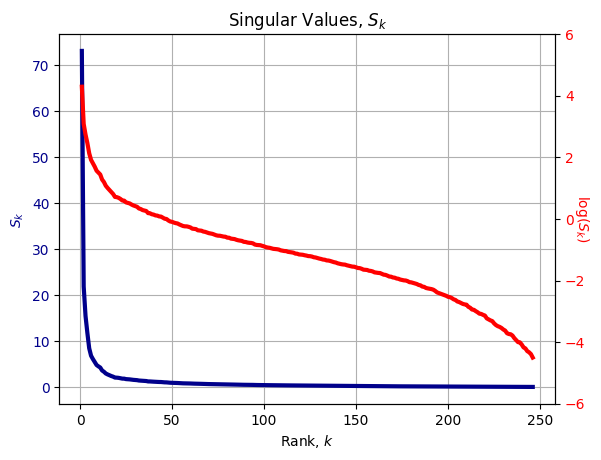

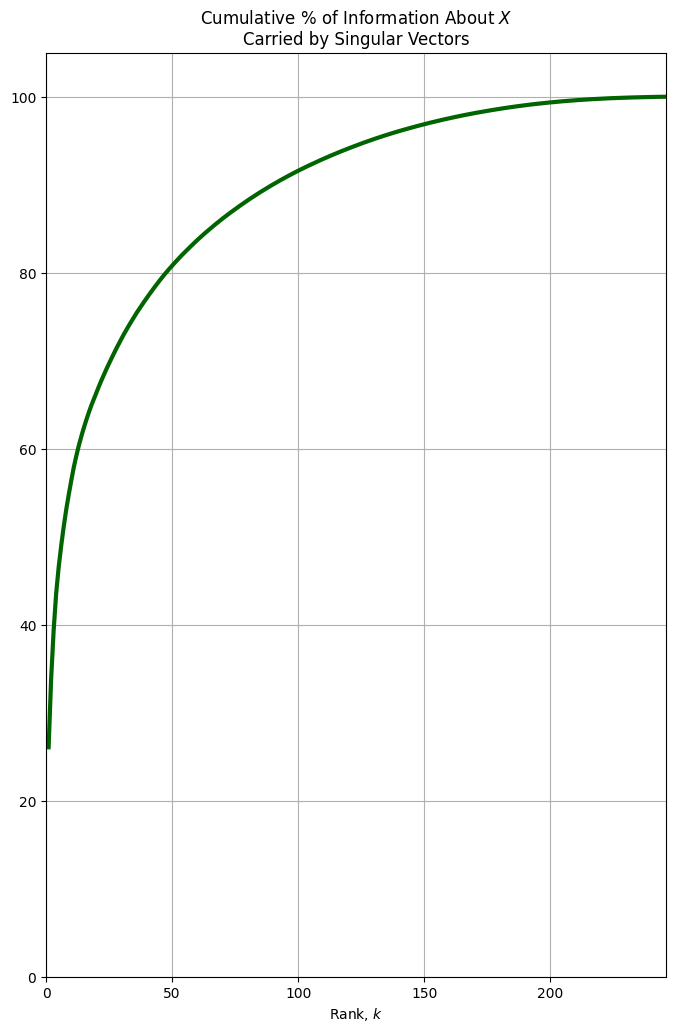

In [269]:
### Raw singular values
plt.plot(component_idx, S, label='Singular Values of $$X$$', color='darkblue', linewidth=3)
plt.grid()
plt.xlabel("Rank, $k$")
plt.ylabel('$S_k$', color='darkblue')
plt.tick_params(axis='y', labelcolor='darkblue')
plt.title('Singular Values, $S_k$')

### log(singular values)
twax = plt.gca().twinx()  # twin axes that shares the same x-axis
twax.plot(component_idx, np.log(S), color='red', linewidth=3)
plt.ylabel('$\log(S_k)$\n', color='red', rotation=270)
plt.tick_params(axis='y', labelcolor='red')
plt.ylim([-6, 6])

## Information retained as function of rank
fig, axs = plt.subplots(1, 1, figsize=(8, 12))
plt.plot(component_idx, info_retained, color='darkgreen', linewidth=3)
plt.xlim(0, n_components)
plt.ylim([0, 105])
plt.xlabel("Rank, $k$")
plt.grid()
plt.title('Cumulative % of Information About $X$\nCarried by Singular Vectors')

### Your observation and remarks: (double click this block to modify)
This code appears to be creating a visualization of singular values and related information. It is divided into three parts:

1. **Raw Singular Values Plot**:
   - The first part of the code uses `plt.plot` to create a line plot of singular values `S` against the rank `component_idx`.
   - It labels the plot and sets the color, xlabel, and ylabel accordingly.
   - A twin y-axis (`twax`) is created to overlay another plot on the same chart.

2. **log(Singular Values) Plot**:
   - The code creates a second line plot on the twin y-axis (`twax`) to visualize the natural logarithm of the singular values (`np.log(S)`) against the rank `component_idx`.
   - It labels this plot with a different color and ylabel and rotates the label for better visibility.
   - The y-axis limits are set between -6 and 6.

3. **Information Retained as a Function of Rank Plot**:
   - The code switches to a subplot (`fig, axs = plt.subplots(1, 1, figsize=(8, 12))`) for this plot.
   - It creates a line plot of `info_retained` (cumulative percentage of information retained) against the rank `component_idx`.
   - It sets the x-axis limits to be between 0 and `n_components` and the y-axis limits between 0 and 105.
   - Proper labels, xlabel, and gridlines are added to this plot.

Observations and Remarks:

- The code aims to visualize the behavior of singular values and the cumulative percentage of information retained as the rank `k` varies.
- The first plot shows the raw singular values, which represent the importance of each singular vector in descending order.
- The second plot displays the logarithm of singular values, which can be helpful in understanding the relative differences in magnitude.
- The third plot illustrates how much information is retained as more singular vectors are included in the decomposition. It provides insights into the dimensionality reduction process.


Illustrate the compressed image, with selected ranks varying from 1 to 500 (for example, you can take ranks equaling to 1, 5, 10, 100, 200, 300)
The constructed image is still calculated by multiplying U S and V (transpose), but with rank number limited.


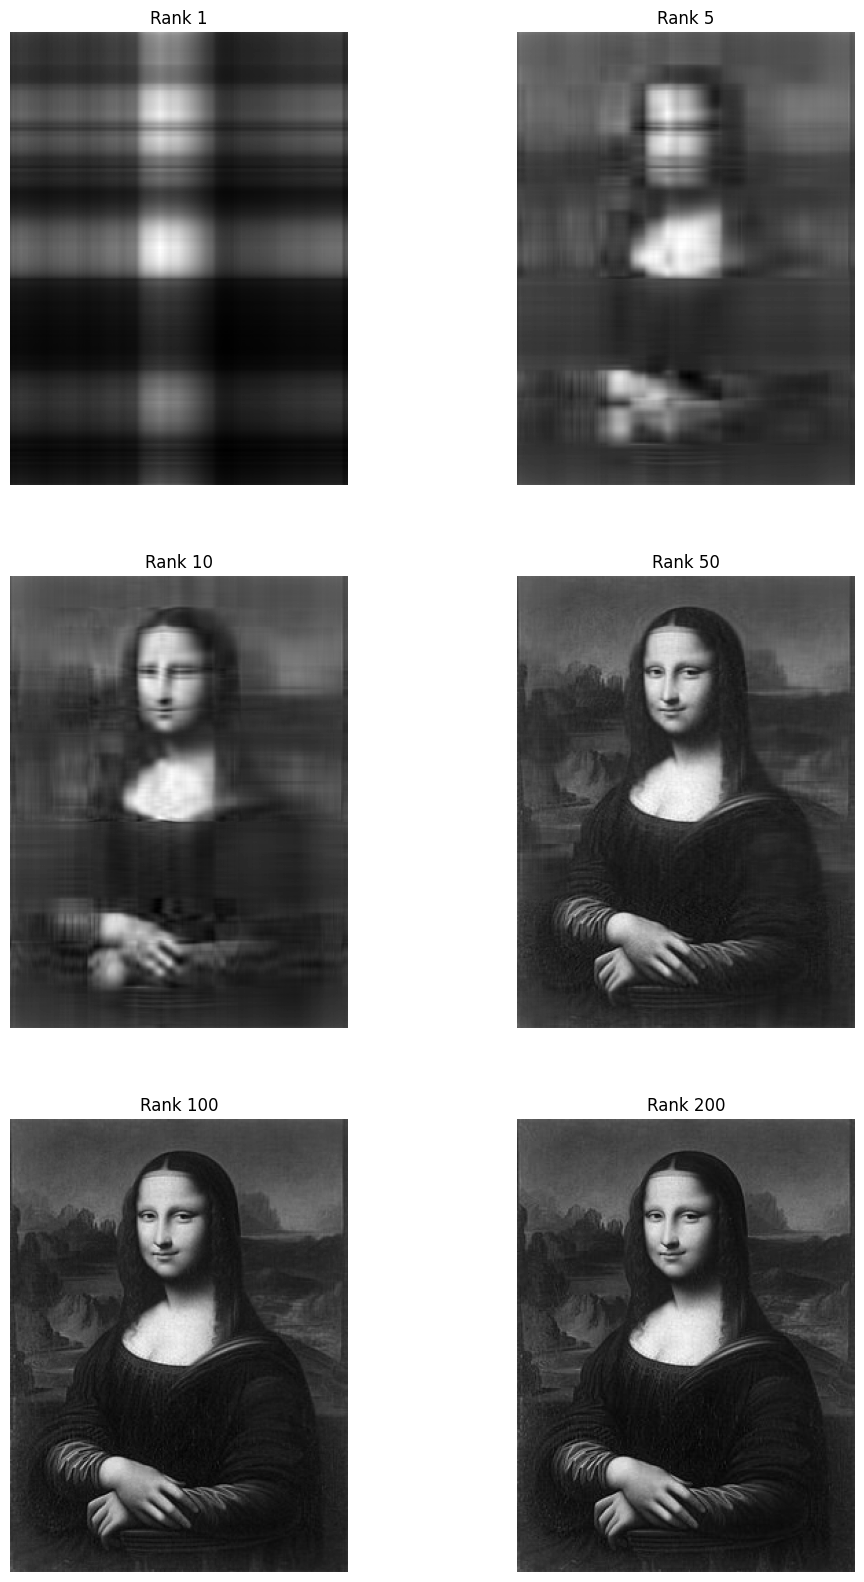

In [313]:
plt.figure(figsize=(12, 20))

for i, rank in enumerate([1, 5, 10, 50, 100, 200]):
    
    # 5. Construct the image by low rank SVD components, with rank value given
    img_compressed = U[:, :rank] @ np.diag(S[:rank]) @ VT[:rank, :]

    # Plot the image
    plt.subplot(3, 2, i + 1)
    plt.title(f"Rank {rank}")
    plt.imshow(img_compressed, cmap="gray")
    plt.axis("off")

You may find that the quality of the compressed image is acceptable with a relatively low rank. This phenomenon is consistent with the plot of cumulative of information with low rank.
Now, calculate the compression rate with a given rank.

The compression rate is simply calculated by the whole size of matrix stored (U,S,V) divided by the size of the matrix representing the original image

In [310]:
# 6. Write your method of compressing_rate(A, r), then calculate the compression rate with the rank selected above.
def compressing_rate(A, r):
    """
    Calculate the compressing rate of matrix A by SVD with rank limited to r.

    Args:
        A: ndarray, the original matrix
        r: integer, the value of rank
    Returns:
        cr: compressing_rate
    """

    # Perform SVD on the original matrix A
    U, S, Vt = np.linalg.svd(A, full_matrices=False)

    # Truncate the singular value matrices to rank r
    Ur = U[:, :r]
    Sr = np.diag(S[:r])
    Vtr = Vt[:r, :]

    # Reconstruct the matrix with reduced rank
    Ar = np.dot(Ur, np.dot(Sr, Vtr))

    # Calculate the compression rate
    original_size = A.size
    compressed_size = (Ur.size + Sr.size + Vtr.size)
    cr = compressed_size / original_size

    return cr

In [312]:
# 7. Calculate the compression rate with the rank selected above.
for rank in [1, 5, 10, 50, 100, 200]:
    cr = compressing_rate(img, rank)
    print(f"Rank {rank}: {cr:.2f}")
#the compression rate is greater than 1 because the SVD matrices are rounded which causes the size of the compressed image to be larger than the original image

Rank 1: 0.01
Rank 5: 0.04
Rank 10: 0.07
Rank 50: 0.39
Rank 100: 0.83
Rank 200: 1.91
